IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

CONVERTING EXCEL FILE TO DATAFRAME

In [2]:
df = pd.read_excel('Dataset_for_ML.xlsx')

In [3]:
df.head()

,Date,# Total Test,# Total Case,# Total Deaths,# Total Recovered,# Daily Cases,# Daily Tests,# Daily Deaths,# Daily Recovered,Month,Year,Season
0,31 MAY 2022,163204823,15072747,98965,14960730,975,128854,4,946,MAY,2022,SPRING
1,30 MAY 2022,163075969,15071772,98961,14959784,908,133352,4,1005,MAY,2022,SPRING
2,29 MAY 2022,162942617,15070864,98957,14958779,864,129961,2,1107,MAY,2022,SPRING
3,28 MAY 2022,162812656,15070000,98955,14957672,966,138752,3,1104,MAY,2022,SPRING
4,27 MAY 2022,162673904,15069034,98952,14956568,940,134252,4,1237,MAY,2022,SPRING


We need dummy values for the Season and Month 

In [4]:
dummy_for_season = pd.get_dummies(df['Season'], drop_first= False).astype(int)
dummy_for_month = pd.get_dummies(df['Month'], drop_first= False).astype(int)


In [5]:
df = pd.concat([df, dummy_for_month, dummy_for_season],axis =1)

In [6]:
df.head()

,Date,# Total Test,# Total Case,# Total Deaths,# Total Recovered,# Daily Cases,# Daily Tests,# Daily Deaths,# Daily Recovered,Month,...,JUNE,MARCH,MAY,NOVEMBER,OCTOBER,SEPTEMBER,FALL,SPRING,SUMMER,WINTER
0,31 MAY 2022,163204823,15072747,98965,14960730,975,128854,4,946,MAY,...,0,0,1,0,0,0,0,1,0,0
1,30 MAY 2022,163075969,15071772,98961,14959784,908,133352,4,1005,MAY,...,0,0,1,0,0,0,0,1,0,0
2,29 MAY 2022,162942617,15070864,98957,14958779,864,129961,2,1107,MAY,...,0,0,1,0,0,0,0,1,0,0
3,28 MAY 2022,162812656,15070000,98955,14957672,966,138752,3,1104,MAY,...,0,0,1,0,0,0,0,1,0,0
4,27 MAY 2022,162673904,15069034,98952,14956568,940,134252,4,1237,MAY,...,0,0,1,0,0,0,0,1,0,0


We can drop the columns we are not going to use in the model.

In [7]:
df.drop(['# Total Test', '# Total Case', '# Total Deaths', '# Total Recovered', 'Month', 'Season', 'Year', 'Date'], axis=1, inplace=True)

In [8]:
df.head()

,# Daily Cases,# Daily Tests,# Daily Deaths,# Daily Recovered,APRIL,AUGUST,DECEMBER,FEBRUARY,JANUARY,JULY,JUNE,MARCH,MAY,NOVEMBER,OCTOBER,SEPTEMBER,FALL,SPRING,SUMMER,WINTER
0,975,128854,4,946,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,908,133352,4,1005,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,864,129961,2,1107,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,966,138752,3,1104,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,940,134252,4,1237,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


LINEAR REGRESSION 

We are ready to train the model.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X = df.drop(['# Daily Deaths'], axis= 1)
y = df['# Daily Deaths']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = lm.predict(X_test)

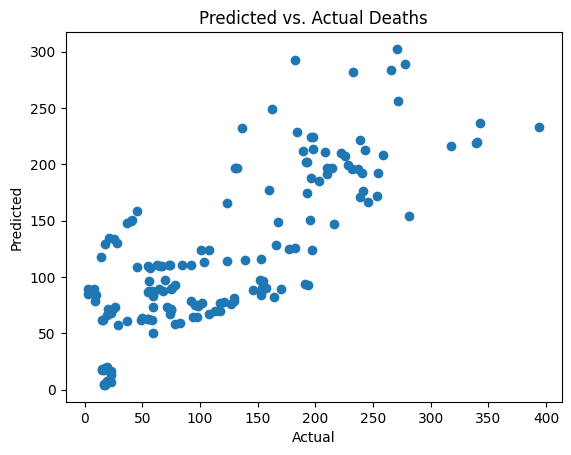

In [15]:
plt.scatter(x= y_test, y= predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Deaths')
plt.savefig("lm.png")
plt.show()

In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 43.349371842428795
MSE: 3011.3864705003007
RMSE: 54.87610108690577


KNN

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
knn = KNeighborsRegressor(n_neighbors=5)  # Set the number of neighbors (K)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:
predictions = knn.predict(X_test)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 22.153164556962025
MSE: 1063.4635443037973
RMSE: 32.61078877156757


Finding the optimal N degree

In [22]:
error_rate = []


for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.sqrt(metrics.mean_squared_error(y_test, pred_i)))

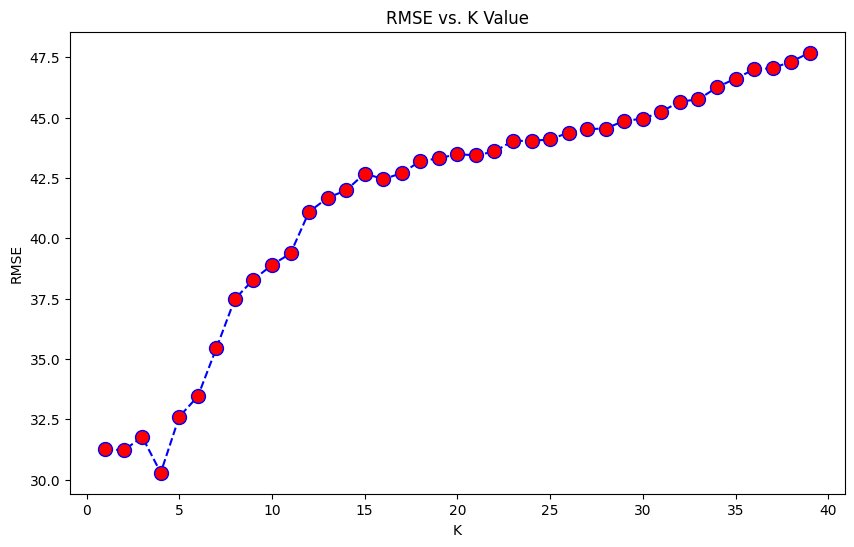

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.savefig("knnOptimal.png")

In [24]:
knn = KNeighborsRegressor(n_neighbors=4)  # Set the number of neighbors (K)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [25]:
predictions = knn.predict(X_test)

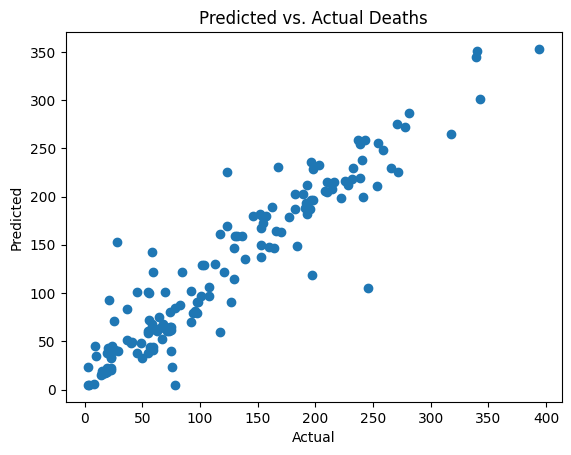

In [26]:
plt.scatter(x= y_test, y= predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Deaths')
plt.savefig("knn.png")
plt.show()

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19.765822784810126
MSE: 917.3504746835443
RMSE: 30.287794153479457


POLYNOMIAL REGRESSION

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
X.head()

,# Daily Cases,# Daily Tests,# Daily Recovered,APRIL,AUGUST,DECEMBER,FEBRUARY,JANUARY,JULY,JUNE,MARCH,MAY,NOVEMBER,OCTOBER,SEPTEMBER,FALL,SPRING,SUMMER,WINTER
0,975,128854,946,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,908,133352,1005,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,864,129961,1107,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,966,138752,1104,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,940,134252,1237,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [30]:
degree = 2 
poly = PolynomialFeatures(degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_poly = poly.fit_transform(X_train)


In [31]:
lm = LinearRegression()
lm.fit(X_poly, y_train)



LinearRegression()

In [32]:
X_test_poly = poly.transform(X_test)
predictions = lm.predict(X_test_poly)

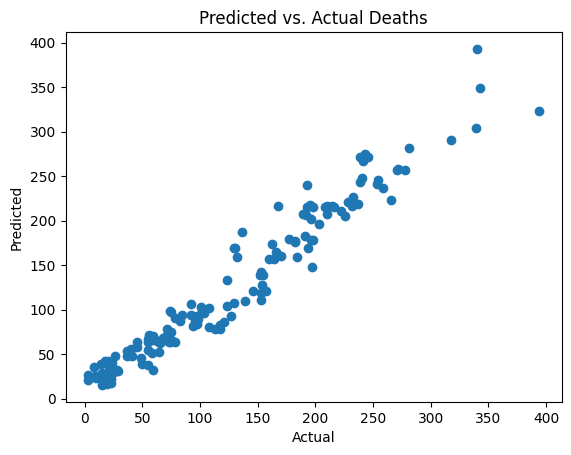

In [33]:
plt.scatter(x=y_test, y=predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Deaths')
plt.savefig("polyreg.png")
plt.show()

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 15.21970427608532
MSE: 397.9545542496973
RMSE: 19.948798315931146


DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dtree = DecisionTreeRegressor()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
predictions = dtree.predict(X_test)

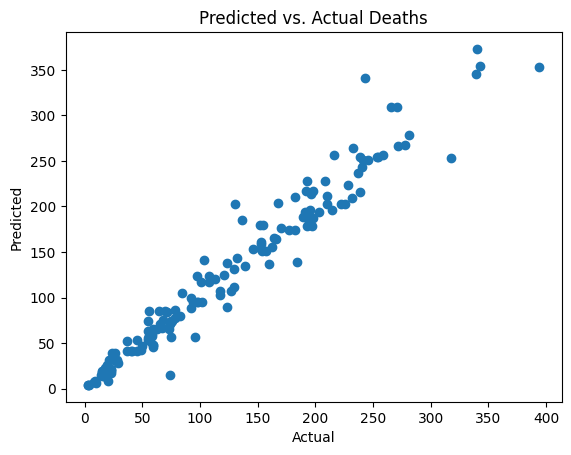

In [40]:
plt.scatter(x=y_test, y=predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Deaths')
plt.savefig("decisiontree.png")
plt.show()

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 12.056962025316455
MSE: 372.15822784810126
RMSE: 19.291402951784022


RANDOM FOREST

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=600, random_state=1)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600, random_state=1)

In [45]:
predictions = rfc.predict(X_test)

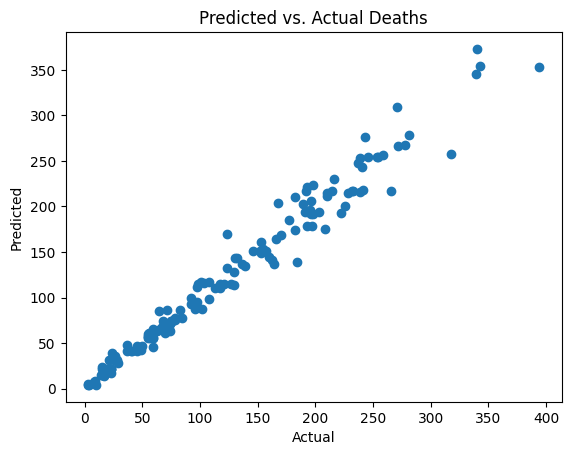

In [46]:
plt.scatter(x=y_test, y=predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Deaths')
plt.savefig("randomforest.png")
plt.show()

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.056962025316455
MSE: 203.93037974683546
RMSE: 14.280419452762425
